In [27]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [28]:
class BatmanState(TypedDict):
    
    runs : int
    balls : int
    fours : int
    sixes : int   
    
    strike_rate : float
    boll_per_boundary : float
    boundary_percentage : float
    summary : str
    
    

In [29]:
def calculate_strike_rate(state: BatmanState) -> BatmanState:
    
    strike = (state['runs'] / state['balls']) * 100
    return {'strike_rate': strike}

In [30]:
import re


def calculate_boll_per_boundary(state: BatmanState) -> BatmanState:
    
    boll_per_boundary = state['balls'] / (state['fours'] + state['sixes'])
    
    return {'boll_per_boundary': boll_per_boundary}

In [31]:
def calculate_boundary_percentage(state: BatmanState) -> BatmanState:

    boundary_percentage = (((state['fours'] * 4) + (state['sixes'] * 6))/ state['runs']) * 100
    
    return {'boundary_percentage': boundary_percentage} 

In [32]:
def summary(state: BatmanState) -> BatmanState:
    
    summary = (f"Runs: {state['runs']}, Balls: {state['balls']}, Fours: {state['fours']}, Sixes: {state['sixes']}, "
                f"Strike Rate: {state['strike_rate']:.2f}, Balls per Boundary: {state['boll_per_boundary']:.2f}, "
                f"Boundary Percentage: {state['boundary_percentage']:.2f}%")
    return {'summary': summary}

In [33]:
graph = StateGraph(BatmanState)

graph.add_node('calculate_strike_rate', calculate_strike_rate)
graph.add_node('calculate_boll_per_boundary', calculate_boll_per_boundary)
graph.add_node('calculate_boundary_percentage', calculate_boundary_percentage)
graph.add_node('summary', summary)


graph.add_edge(START, 'calculate_strike_rate')
graph.add_edge(START, 'calculate_boll_per_boundary')
graph.add_edge(START, 'calculate_boundary_percentage')

graph.add_edge('calculate_strike_rate', 'summary')
graph.add_edge('calculate_boll_per_boundary', 'summary')
graph.add_edge('calculate_boundary_percentage', 'summary')
graph.add_edge('summary', END)

workflow = graph.compile()

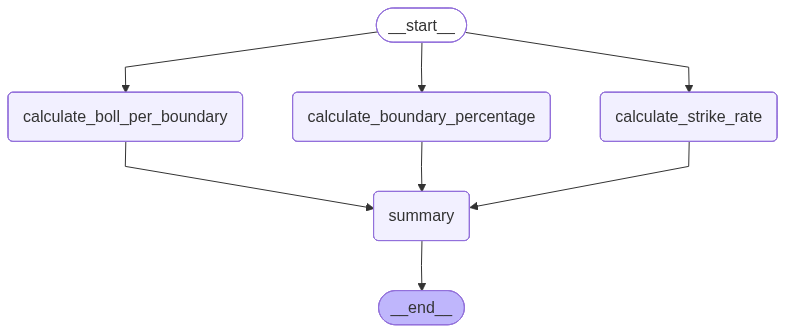

In [34]:
workflow

In [36]:
initial_state: BatmanState = {
    'runs': 86,
    'balls': 65,
    'fours': 8,
    'sixes': 3,
}


In [38]:
final_state = workflow.invoke(initial_state)
final_state

{'runs': 86,
 'balls': 65,
 'fours': 8,
 'sixes': 3,
 'strike_rate': 132.3076923076923,
 'boll_per_boundary': 5.909090909090909,
 'boundary_percentage': 58.139534883720934,
 'summary': 'Runs: 86, Balls: 65, Fours: 8, Sixes: 3, Strike Rate: 132.31, Balls per Boundary: 5.91, Boundary Percentage: 58.14%'}